# Deep Neural Network for Binary Classification

## N layer with N hidden units are designed with following options

  **1 ** ) **Hyper Paremters Initialization**
                 - zero Initialization
                 - random Initialization
                 - HE Initialization
  **2 ** ) **Forward Propogation**
                 - Out of L layers first L-1 layers use Relu activation function
                 - Lth layer uses sigmoid activation function
  **3 ** ) **Regulariztion**
                 - Dropout
                 - lambda with L2 regularization
  **4 ** )  **Cost**
                 - L2 Regularization
  **5 ** ) **Optimization**
                 - Gradient Descent Algorithm
  **6 ** ) **validation**
                  - Gradient checking if backpropogation work proper
                 

In [1]:
import time
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_table("C:/Users/gokul/Documents/Projects/Neural Networks/data_banknote_authentication.txt", sep=',', header=None)
Xpd = data[[0,1,2,3]]
ypd = data[4]
#X_train, X_test, y_train, y_test = train_test_split(Xpd, ypd, test_size=0.10, random_state=324)
X_el = np.matrix(Xpd)
Y_el = np.matrix(ypd)
X, X_test, Y, y_test = train_test_split(X_el, Y_el.T, test_size=0.10, random_state=324)
X = X.T
Y.shape #(m,1)

(1234, 1)

# Hyper Parameter (W, b) Initialization

**HE Initiallization ** : This function is similar to the previous `initialize_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 10, you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation. 

In [2]:
def initialize_parameters_deep(layers_dims,initialization="he"):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    

    for l in range(1, L):
        
        if initialization == "zeros":
            parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization == "random":
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 0.01
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization == "he":
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
            #print(parameters['W' + str(l)].shape)
            #print(parameters['b' + str(l)].shape)
        
        assert(parameters['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layers_dims[l], 1))

        
    return parameters

# Foward Propogation Algorithm starts here

.

In [3]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+np.exp(-z))
    return s,z

def relu(z):
    s = (abs(z) + z) / 2
    return s,z

In [4]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W,A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [5]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        #Z = np.dot(W,A_prev) + b
        A, activation_cache = sigmoid(Z)
        #print("sigmoid")
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        #Z = np.dot(W,A_prev) + b
        A, activation_cache = relu(Z)
        #print("relu")
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [6]:
def L_model_forward(X, parameters,keep_prob=1):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        #print(A_prev.shape)
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)] ,parameters['b' + str(l)], "relu")
        D = np.random.rand(A.shape[0],A.shape[1])
        D = D < keep_prob
        #print(A.shape[0])
        A = np.multiply(A,D )
        A = A/keep_prob
        cache = cache + (D,)
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A,parameters['W' + str(L)] ,parameters['b' + str(L)],"sigmoid" )
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [7]:
parameters = initialize_parameters_deep([4,5,2,1], "he")
print(parameters["W1"].shape)
AL, caches = L_model_forward(X, parameters,1)
AL.shape
#caches[0]

(5, 4)


(1, 1234)

# Cost Computation 
## L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$


In [8]:
def compute_cost(AL, Y,parameters=None,lambd=0.01,regularized=False):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    parameters -- python dictionary containing parameters of the model

    Returns:
    cost --  value of the regularized loss function (formula (2))
    """
    
    m = Y.shape[1]
    cross_entropy_cost = -(1/m)* np.sum(np.multiply(np.log(AL),Y) + np.multiply((1-Y),np.log(1-AL)))
    
    #print(AL.shape)
    
    if regularized == True:
        temp = 0
        loop_len = len(parameters)//2
        for i in range(1,loop_len+1):
            temp += np.sum(np.square(parameters['W' + str(i)]))
        L2_regularization_cost = (1/m) * (lambd/2) * temp
        #print("L2_regularization_cost {}".format(L2_regularization_cost))
        #L2_regularization_cost = (1/m) * (lambd/2) * (np.sum(np.square(parameters["W1"])) + np.sum(np.square(parameters["W2"])) + np.sum(np.square(parameters["W3"])))
        #print(L2_regularization_cost)
        cost = cross_entropy_cost + L2_regularization_cost
    else:
        cost = cross_entropy_cost
        
    #print("Cross Entropy cost {}".format(cross_entropy_cost))
    
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [9]:
cost = compute_cost(AL, Y.T,parameters,0.01,False)
print(cost)
kldjf = 4
if kldjf is None:
    print("he")
elif kldjf is not(None):
    print("kljdf")

0.670889593999
kljdf


## Back Propogation Alogorithm starts here

.

In [149]:
def linear_backward(dZ, cache,D,lambd,keep_prob,val):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    #linear_cache, activation_cache,D = cache

    linear_cache, activation_cache, dummy= cache
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    #print("W shape: {}".format(W.shape))
    #print("DZ shape: {}".format(dZ.shape))
    #print(dZ.shape)
    dA_prev = np.dot(W.T, dZ)
    #print("DA_prev shape: {}".format(dA_prev.shape))
    #print("D shape: {}".format(D.shape))
    if val ==0:
        dZ_prev = None
    else:
        dA_prev = np.multiply(dA_prev,D )
        dA_prev = dA_prev/keep_prob
        dZ_prev = np.multiply(dA_prev, np.int64(A_prev > 0))
    
    dW = (1./m) * np.dot(dZ,A_prev.T) + ((lambd/m) * W)
    db = (1./m) * np.sum(dZ,axis=1)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dZ_prev, dA_prev, dW, db

In [150]:
def L_model_backward(AL, Y, caches, lambd=0,keep_prob=1):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    #print(L)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation and dZL for last layer 
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    #print("AL shape {}".format(AL.shape))
    linear_cache, activation_cache = caches[L-1]
    A_prev2, W3, b3 = linear_cache
    #print("A_prev2 {}".format(A_prev2.shape))
    
    dZ_prev3 = AL - Y
    #print("dZ_prev {}".format(dZ_prev3.shape))
    grads["dW" + str(L)] = 1./m * np.dot(dZ_prev3, A_prev2.T)+((lambd/m) * W3)
    grads["db" + str(L)] = 1./m * np.sum(dZ_prev3, axis=1)
    #print("DWL shape: {}".format( grads["dW" + str(L)].shape))
    #print("DbL Shape: {}".format(grads["db" + str(L)].shape))
    dA_prev2 = np.dot(W3.T, dZ_prev3)
    
    
    #print("dA_prev2 shape: {}".format(dA_prev2.shape))
    linear_cache, activation_cache,D = caches[L-2]
    #A_prev, W, b = linear_cache
    #print("D2 shape {}".format(D.shape))
    #print(dA_prev.shape)
    dA_prev2 = np.multiply(D,dA_prev2)
    dA_prev2 = dA_prev2/keep_prob
    #print("After dA_prev2 shape: {}".format(dA_prev2.shape))
    dZ = np.multiply(dA_prev2, np.int64(A_prev2 > 0))
    #print("DZ shape last: {}".format(dZ.shape))
    x, y,D_prev = caches[L-3]
    
    #print(dZ_prev.shape)
    #grads["dA" + str(L)] = dAL
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l-1]
        #print(l)
        D = D_prev
        #print(l-1)
        val = l - 1
        dZ_prev, dA_prev_temp, dW_temp, db_temp = linear_backward(dZ, current_cache, D,lambd,keep_prob, val)
        if val ==0:
            pass
        else:
            x, y, D_prev = caches[l-2]
        dZ = dZ_prev
        #grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l)] = dW_temp
        grads["db" + str(l)] = db_temp
        if val ==0:
            break
    
    return grads

# Updating Hyper Parameters Based on Gradient Descent

.

In [12]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 3 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
    ### END CODE HERE ###
    return parameters


# Model controlling Function

.

In [257]:
def model(X, Y, learning_rate = 0.3, num_iterations = 10000, print_cost = True, lambd = 0, keep_prob = 1):
    
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0],5,3, 1]
    #print(layers_dims)
    # Initialize parameters dictionary.
    parameters = initialize_parameters_deep(layers_dims,"random")
    #print(parameters.keys())

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        AL, cache = L_model_forward(X, parameters,keep_prob)
        cost = compute_cost(AL, Y.T,parameters,lambd,True)
        grads = L_model_backward(AL, Y, cache, lambd,keep_prob)
        #print(grads.keys())
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters,grads

Cost after iteration 0: 0.6931474871638728
Cost after iteration 1000: 0.0060417616322100956
Cost after iteration 2000: 0.002361073439584375
Cost after iteration 3000: 0.0014527429473650754
Cost after iteration 4000: 0.001043993465687414
Cost after iteration 5000: 0.0008131215474465479
Cost after iteration 6000: 0.0006649235626607551
Cost after iteration 7000: 0.0005619567733894033
Cost after iteration 8000: 0.00048643311474383226
Cost after iteration 9000: 0.0004286234642401343


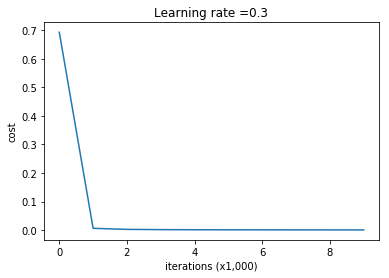

On the train set:
1.0
On the test set:
1.0


In [258]:
keep_prob=0.2
learning_rate = 0.5
parameters,gadual = model(X, Y, keep_prob=1)
print ("On the train set:")
AL, xx = L_model_forward(X, parameters,1)
predicted = np.matrix(np.zeros(AL.shape[1]))
predicted[AL>0.5] = 1
Accuracy = accuracy_score(y_true=Y,y_pred = predicted.T,normalize=True)
print(Accuracy)
print ("On the test set:")
AT, xx = L_model_forward(X_test.T, parameters,1)
Tpredicted = np.matrix(np.zeros(AT.shape[1]))
Tpredicted[AT>0.5] = 1
TAccuracy = accuracy_score(y_true=y_test,y_pred = Tpredicted.T,normalize=True)
print(TAccuracy)

In [259]:
gadual

{'dW1': matrix([[ -2.80036004e-05,  -1.68734148e-05,  -2.93246329e-05,
            1.01422766e-05],
         [ -8.70438297e-06,  -5.24477790e-06,  -9.11500062e-06,
            3.15253247e-06],
         [ -6.90471479e-06,  -2.40297759e-06,   7.17447158e-06,
            4.95887063e-07],
         [ -1.41727791e-05,  -8.53972982e-06,  -1.48413611e-05,
            5.13306303e-06],
         [  4.37921393e-05,   2.04547015e-05,  -3.45916158e-06,
           -8.95348919e-06]]),
 'dW2': matrix([[  0.00000000e+00,   0.00000000e+00,   1.27675658e-07,
            0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00],
         [ -4.85452213e-05,  -1.51045998e-05,   1.13064492e-05,
           -2.46791991e-05,   4.10050357e-05]]),
 'dW3': matrix([[ -9.32988129e-10,   0.00000000e+00,   7.15851826e-05]]),
 'db1': matrix([[  3.27385524e-05],
         [  1.01761521e-05],
         [ -6.48038158e-06],
         [  1.65

# Gradient Descent Checking the back propogation

.

In [277]:
def dictionary_to_vector(parameters):
    l = []
    x = np.array([])
    for key in (parameters):
        temp = np.array(parameters[key].flatten())
        l.append(parameters[key].shape)
        x = np.append(x,temp)
        parameters_values = x.reshape(x.shape[0],1)
    return parameters_values, l
    
def grad_to_vector(grads):
    l = []
    i = 0
    k = len(grads) // 2
    k = 3
    y = np.array([])
    for key in grads:
        i +=1
        temp = np.array(grads["dW" + str(i)].flatten())
        y = np.append(y,temp)
        temp1 = np.array(grads["db" + str(i)].flatten())
        y = np.append(y,temp1)
        if i ==k:
            break
    gradapprox = y.reshape(y.shape[0],1)

    return gradapprox

def vector_to_dictionary(xx,l):
    params = {}
    strt = 0
    for i in range(0,len(l),2):
        wstrt = strt
        u = l[i]
        wend = strt + u[0] * u[1]
        v = l[i+1]
        bstrt = wend
        bend = wend + v[0] * v[1]
        params["W" + str(i//2+1)] = np.matrix(np.reshape(xx[wstrt:wend],l[i]))
        #print(params["W" + str(i//2+1)].shape)
        params["b" + str(i//2+1)] = np.matrix(np.reshape(xx[bstrt:bend],l[i+1])) 
        #print(params["b" + str(i//2+1)].shape)
        strt = bend
    return params

In [282]:
def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Set-up variables
    
    parameters_values,le = dictionary_to_vector(parameters)
    grad = grad_to_vector(gradients)
    #grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    #print(le)
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care about the first one
        thetaplus = np.copy(parameters_values)                                     
        thetaplus[i][0] += epsilon                                
        J_plus[i], _,_,_ = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus,le)) 
        #J_plus[i] = compute_cost(AL,Y)
        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        thetaminus = np.copy(parameters_values)                                      
        thetaminus[i][0] -= epsilon
        J_minus[i], _,_,_ = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus,le))
        #J_minus[i]= compute_cost(ALm, Y)                           
        
        # Compute gradapprox[i]
        gradapprox[i] = (J_plus[i] - J_minus[i]) / (2 * epsilon)  
    
    # Compare gradapprox to backward propagation gradients by computing difference.
    numerator = np.linalg.norm(grad-gradapprox)      
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)     
    #print(denominator)
    difference = numerator/denominator                                           

    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [350]:
def gradient_check(parameters, gradients, X, Y, epsilon = 1e-7):
    num_parameters = 47
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    for key in parameters:
        thetaplus = parameters
        thetaminus = parameters
        i,j = parameters[key].shape
        for k in range(i):
            for l in range(j):
                #print(thetaminus[key])
                thetaminus[key][k,l] = thetaminus[key][k,l] + epsilon
                #print(thetaminus[key])
                thetaminus[key][k,l] = thetaminus[key][k,l] - epsilon
                J_plus[i], _,_,_ = forward_propagation_n(X, Y, thetaplus) 
                J_minus[i], _,_,_ = forward_propagation_n(X, Y,thetaminus)
                gradapprox[i] = (J_plus[i] - J_minus[i]) / (2 * epsilon)  
    grad = grad_to_vector(gradients)
    #print(len(grad))
    numerator = np.linalg.norm(grad-gradapprox)  
    #print(numerator)
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)  
    difference = numerator/denominator                                           

    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Your backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

In [351]:
gradient_check(parameters, gradients, X, Y)

There is a mistake in the backward propagation! difference = 1.0


1.0

In [265]:
def forward_propagation_n(X, Y, parameters):
    """
    Implements the forward propagation (and computes the cost) presented in Figure 3.
    
    Arguments:
    X -- training set for m examples
    Y -- labels for m examples 
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (5, 4)
                    b1 -- bias vector of shape (5, 1)
                    W2 -- weight matrix of shape (3, 5)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    
    Returns:
    cost -- the cost function (logistic cost for one example)
    """
    #print(parameters["W2"].shape)
    # retrieve parameters
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    #print(W2.shape)
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    #print(W3.shape)
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1,_ = relu(Z1)
    #print(W2.shape)
    #print(A1)
    Z2 = np.dot(W2, A1) + b2
    A2,_ = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3,_ = sigmoid(Z3)

    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    cache1 = ( W1, b1,W2, b2, W3, b3)
    
    cac = [((X,W1,b1),(0),(0)),((A1,W2,b2),(0),(0)),((A2,W3,b3),(0))]
    
    return cost, cache, cache1, cac
    #return A3, cac

In [266]:
def backward_propagation_n(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input datapoint, of shape (input size, 1)
    Y -- true "label"
    cache -- cache output from forward_propagation_n()
    
    Returns:
    gradients -- A dictionary with the gradients of the cost with respect to each parameter, activation and pre-activation variables.
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y.T
    print(Y.shape)
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    gradd = { "dW3": dW3, "db3": db3,
                 "dW2": dW2, "db2": db2,
                  "dW1": dW1, "db1": db1}
    
    return gradd

In [267]:
cost, cache,cache1, cac = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)

#AL,cac = forward_propagation_n(X,Y, parameters)
#gradx = L_model_backward(AL, Y, cac)
#difference = gradient_check_n(parameters, gradients, X, Y)
#print(gradx)
mine,_ = grad_to_vector(gadual)
cour,_ = grad_to_vector(gradients)
#print(gradients)

(1234, 1)


In [271]:
gadual

{'dW1': matrix([[ -2.80036004e-05,  -1.68734148e-05,  -2.93246329e-05,
            1.01422766e-05],
         [ -8.70438297e-06,  -5.24477790e-06,  -9.11500062e-06,
            3.15253247e-06],
         [ -6.90471479e-06,  -2.40297759e-06,   7.17447158e-06,
            4.95887063e-07],
         [ -1.41727791e-05,  -8.53972982e-06,  -1.48413611e-05,
            5.13306303e-06],
         [  4.37921393e-05,   2.04547015e-05,  -3.45916158e-06,
           -8.95348919e-06]]),
 'dW2': matrix([[  0.00000000e+00,   0.00000000e+00,   1.27675658e-07,
            0.00000000e+00,   0.00000000e+00],
         [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
            0.00000000e+00,   0.00000000e+00],
         [ -4.85452213e-05,  -1.51045998e-05,   1.13064492e-05,
           -2.46791991e-05,   4.10050357e-05]]),
 'dW3': matrix([[ -9.32988129e-10,   0.00000000e+00,   7.15851826e-05]]),
 'db1': matrix([[  3.27385524e-05],
         [  1.01761521e-05],
         [ -6.48038158e-06],
         [  1.65

In [289]:
gradients["dW1"][0,0]
gradients.keys()

dict_keys(['dW3', 'db3', 'dW2', 'db2', 'dW1', 'db1'])

In [294]:
lex = []
for key in parameters:
    lex.append(parameters[key].shape)
#print(parameters[key][4,3])

In [296]:
lex[1]

(5, 1)

In [297]:
i,j = lex[1]

In [313]:
for key in parameters:
    #print(key)
    i,j = parameters[key].shape
    #print(lex[0])
    #i = i -1 
    #j = j-1
    for k in range(i):
        #print(k)
        for l in range(j):
            #print(l)
            print(parameters[key][k,l] )
    

1.29838516018
0.771859730377
1.36583310687
-0.333088894505
0.403791155778
0.241178163916
0.423636501374
-0.100894627076
0.268780677276
-0.032420041595
-0.312671360747
-0.0487156808275
0.65020740019
0.402019278381
0.693222799141
-0.156889663565
-1.27665880749
-0.0674376791883
0.74285497554
0.244539764566
-0.244420107901
-0.0777385307676
0.145219415267
-0.132600616501
-0.154788705772
-0.0120800455547
-0.00213066063392
0.00555714517598
0.00221181812367
-0.0102434844551
-0.0071299332647
0.00625202380442
-0.00160537453903
-0.0076883989816
-0.0023005763333
2.07674280975
0.645515739986
-0.441088036009
1.05105120911
-1.5063586449
-0.0119490085409
-4.53938652322e-05
-0.224797087849
-0.0232969677047
-0.00923785553525
-2.88892885973
7.17863779293


In [307]:
parameters

{'W1': matrix([[ 1.29838516,  0.77185973,  1.36583311, -0.33308889],
         [ 0.40379116,  0.24117816,  0.4236365 , -0.10089463],
         [ 0.26878068, -0.03242004, -0.31267136, -0.04871568],
         [ 0.6502074 ,  0.40201928,  0.6932228 , -0.15688966],
         [-1.27665881, -0.06743768,  0.74285498,  0.24453976]]),
 'W2': matrix([[ -1.20800456e-02,  -2.13066063e-03,   5.55714518e-03,
            2.21181812e-03,  -1.02434845e-02],
         [ -7.12993326e-03,   6.25202380e-03,  -1.60537454e-03,
           -7.68839898e-03,  -2.30057633e-03],
         [  2.07674281e+00,   6.45515740e-01,  -4.41088036e-01,
            1.05105121e+00,  -1.50635864e+00]]),
 'W3': matrix([[-0.02329697, -0.00923786, -2.88892886]]),
 'b1': matrix([[-0.24442011],
         [-0.07773853],
         [ 0.14521942],
         [-0.13260062],
         [-0.15478871]]),
 'b2': matrix([[ -1.19490085e-02],
         [ -4.53938652e-05],
         [ -2.24797088e-01]]),
 'b3': matrix([[ 7.17863779]])}